# Loading packages

In [139]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

# 1. Importing the dataset

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# EDA

In [7]:
# Let’s observe the shape of our datasets.
print('df data shape :', df.shape)

df data shape : (23524, 13)


In [8]:
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [9]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [13]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524.0,NaN,NaN,NaN,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
uniqueid,23524,8735,uniqueid_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524.0,NaN,NaN,NaN,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,NaN,NaN,NaN,38.80522,16.520569,16.0,26.0,35.0,49.0,100.0
gender_of_respondent,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Almost 85% don't have bank account
# Most of the respondents are from the rural area (+- 60%)
# 74% have cellphone, but probably not a smartphone
# A bit more than 50% are head of household. We suspect that there are many people that live alone
# 86% of peolple don't have bank account
# Low level educatiom. 70% with no education or just primary education

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

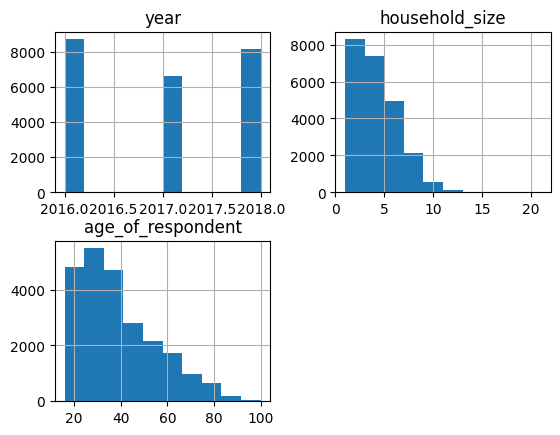

In [20]:
df.hist()

In [24]:
df['household_size'].value_counts().sort_index()

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: count, dtype: int64

In [25]:
df['relationship_with_head'].value_counts().sort_index()

relationship_with_head
Child                   2229
Head of Household      12831
Other non-relatives      190
Other relative           668
Parent                  1086
Spouse                  6520
Name: count, dtype: int64

In [33]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: count, dtype: int64

In [34]:
df['education_level'].value_counts().sort_index()

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: count, dtype: int64

In [35]:
df['job_type'].value_counts().sort_index()

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: count, dtype: int64

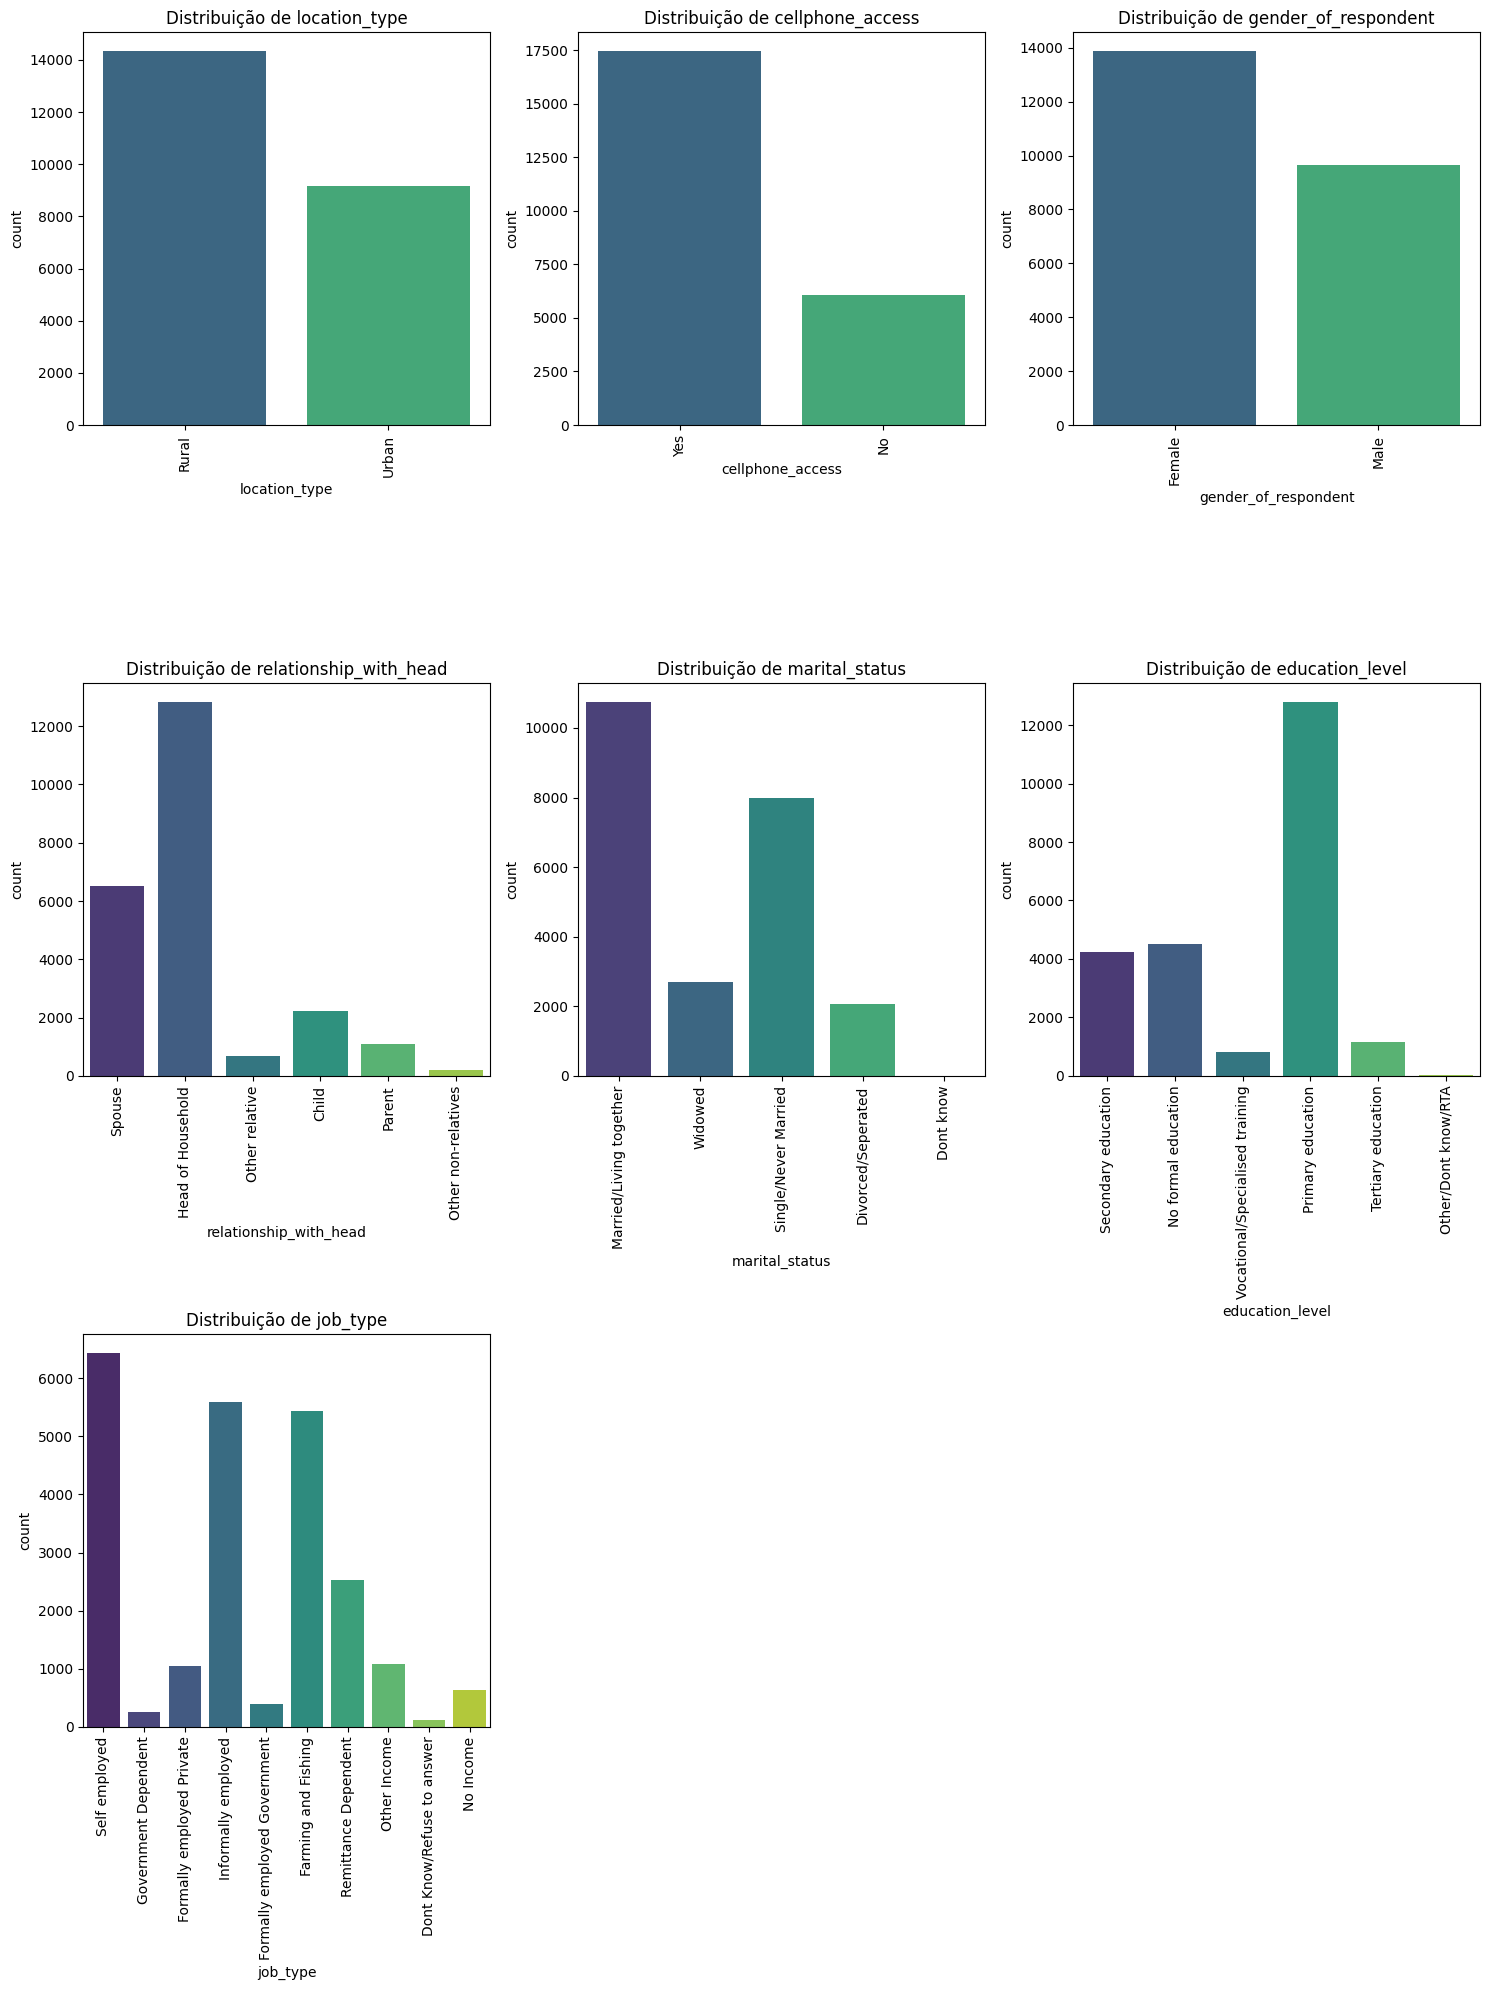

In [38]:
# Selecionando as variáveis categóricas
categorical_vars = ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Configurando o tamanho do gráfico
plt.figure(figsize=(15, 20))

# Loop sobre as variáveis categóricas para criar subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Distribuição de {var}')
    plt.xticks(rotation=90)

# Ajustando o layout
plt.tight_layout()
plt.show()

plt.show()

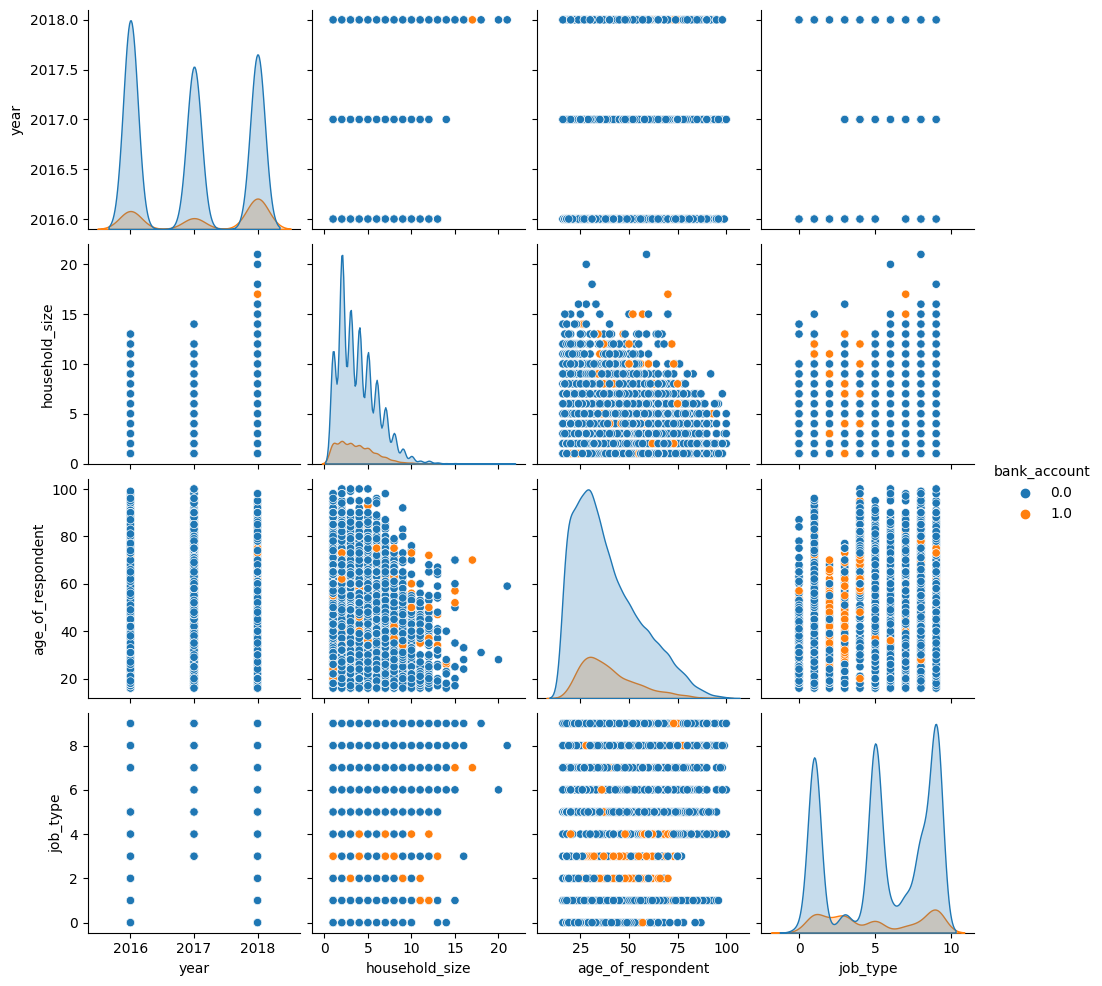

In [76]:
sns.pairplot(df_bak, hue='bank_account')  

In [89]:
df_bak = df.copy()

# Feature engineering

In [92]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

In [95]:
df_bak.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,24,0,5,2,3,9
1,0,2,0,0,0,5,70,0,1,4,0,4
2,0,2,1,1,1,5,26,1,3,3,5,9
3,0,2,0,0,1,5,34,0,1,2,2,3
4,0,2,0,1,0,8,26,1,0,3,2,5


In [94]:
df_bak.drop('uniqueid', inplace=True, axis=1) 

In [97]:
df_bak.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.094991,-0.161362,0.152285,-0.150003,-0.119158,-0.058778,-0.027055,0.130408,0.009282,-0.050706,0.381066
year,-0.094991,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,-0.161362,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.152285,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.150003,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.119158,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.058778,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,-0.027055,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.130408,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,0.009282,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011


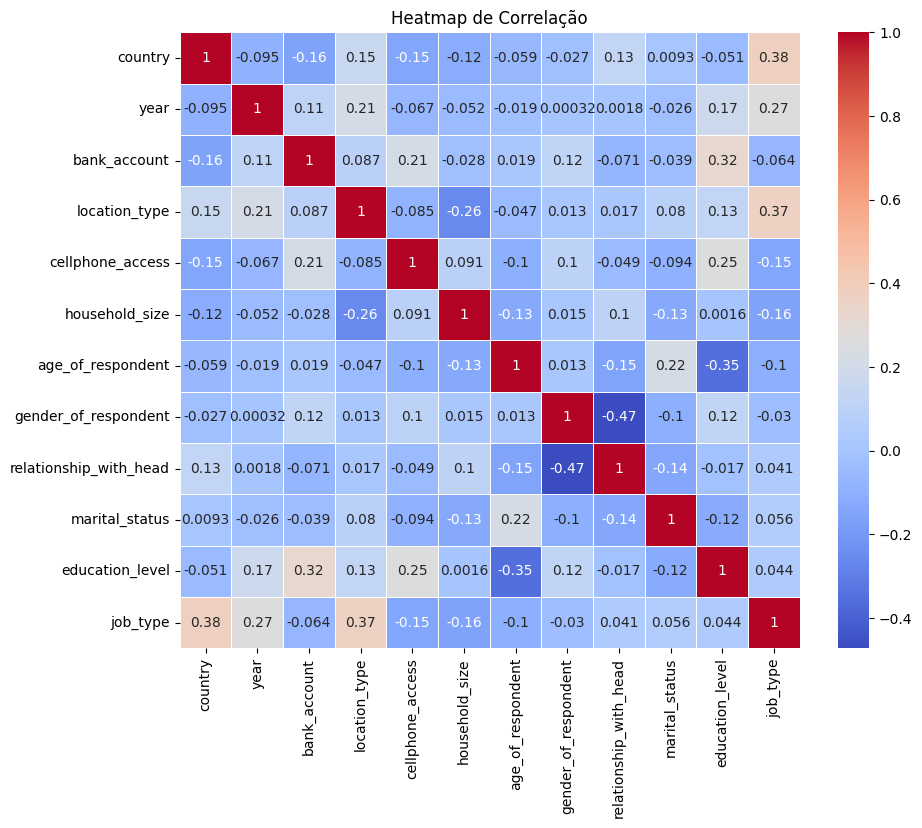

In [104]:
# Selecionar as colunas que deseja incluir no heatmap
cols = ['job_type', 'bank_account']


# Criar uma matriz de correlação entre as colunas selecionadas
correlation_matrix = df_bak.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap com cores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Definir o título do heatmap
plt.title('Heatmap de Correlação')

# Exibir o heatmap
plt.show()


In [114]:
df_bak.drop(['household_size', 'marital_status'], inplace=True, axis=1) 

In [115]:
df_bak.head()

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,education_level,job_type
0,0,2,1,0,1,24,0,5,3,9
1,0,2,0,0,0,70,0,1,0,4
2,0,2,1,1,1,26,1,3,5,9
3,0,2,0,0,1,34,0,1,2,3
4,0,2,0,1,0,26,1,0,2,5


In [117]:
df_bak.shape

(23524, 10)

# Hypothesis

#### Most peolple that don't have bank account are from rural area.
#### Peolple with cell phones have no bank account
#### Peolple with high education have more access to bank account
#### Profile from bank accounter

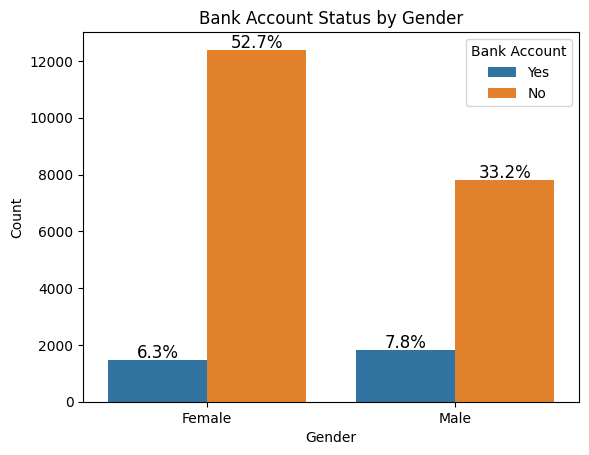

In [120]:
ax = sns.countplot(x='gender_of_respondent', hue='bank_account', data=df)
# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
# Customize the plot
plt.title("Bank Account Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])
# Show the plot
plt.show()

# Feature engineering

1. Treat missing values    
Drop samples, drop the feature, impute them (mean/median/mode, draw numbers from the same distribution, conditional values - kNN k-nearest neighbors im feature space) 
2. Decide with features to use    
We dropped the features 'uniqueID', 'household_size', 'marital_status' based on the correlation analysis.
3. Decide on a model     
Logistic Regression, kNN Classifier,  (take the majority value of the k nearest neighbors)
4. Treat the features accordingly     
`Pclass` - OHE (one-hot-encode)    
`Name` - drop (length, extract title, ...)    
`Sex` - OHE     
`Age` - SimpleImputer/kNNImputer, kBinDiscretizer (automatically OHE)  [maybe PolynomialFeature]         
`Ticket` - KBinDiscretizer (OHE) - be aware of turn it into numbers first!!      
`Fare` - MinMaxScaler    
`Cabin` - drop (take the first letter which is the deck, impute U - unkown for missing values)   
`Embarked` - SimpleImpute with mode (maybe drop)   
`Family` - sum SibSp + ParCh + 1 (number of family members on board incl. yourself)    
    - `SibSp` - KBinDiscretizer (OHE probably not ideal because it would not cover unseen numbers)    
    - `ParCh` - KBinDiscretizer (OHE probably not ideal because it would not cover unseen numbers)

# Dumming the features

# Spliting the data and balancing the data

In [124]:
#!pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [125]:
from imblearn.over_sampling import SMOTE
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)from sklearn.model_selection import train_test_split

In [168]:
# select the target
X = df_bak.drop('bank_account', axis=1)
y = df_bak['bank_account']

# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
y_train.value_counts().sort_index()

bank_account
0    16149
1     2670
Name: count, dtype: int64

In [130]:
# Technique SMOTE (Synthetic Minority Over-sampling Technique ) to oversample the minority class
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [132]:
#y_resampled.value_counts().sort_index()

bank_account
0    16149
1    16149
Name: count, dtype: int64

In [170]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

In [172]:
X_resampled2, y_resampled2 = oversampler.fit_resample(X,y)

In [174]:
y_resampled2.value_counts().sort_index()

bank_account
0    20212
1    20212
Name: count, dtype: int64

# Running the model

In [175]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_resampled2, y_resampled2)

KNeighborsClassifier(metric='euclidean')

In [179]:
# Knn Prediction

y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("-----"*10)

# Print confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.8994686503719448
Recall: 0.8364485981308412
--------------------------------------------------


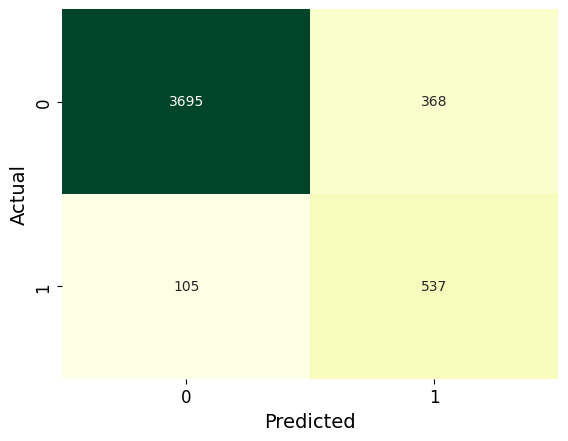

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (seu código para treinar o modelo e fazer previsões)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7385759829968119
Recall: 0.7663551401869159


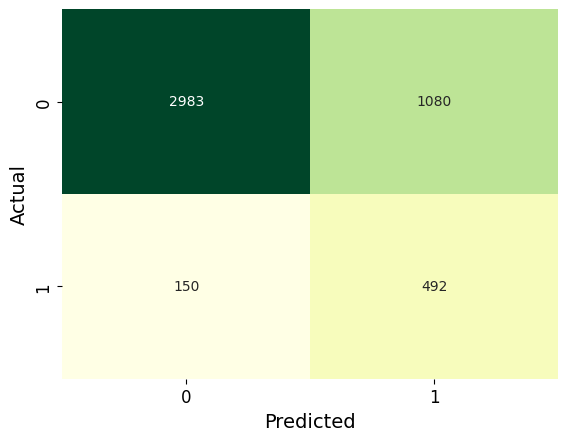

In [181]:
# Logistic regression prediction

logistic_regression = LogisticRegression()
logistic_regression.fit(X_resampled2, y_resampled2)
y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.71')

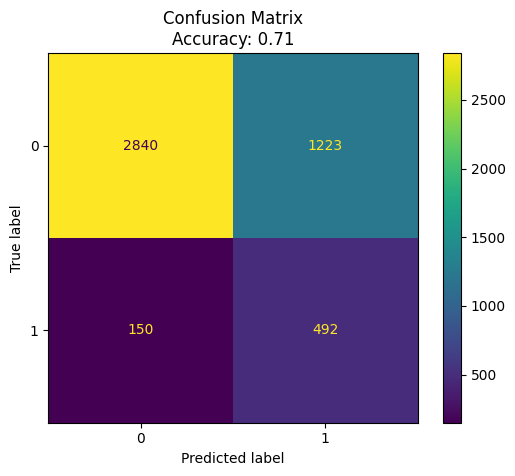

In [149]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

In [182]:
# Random forest prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando uma instância do classificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo no conjunto de treinamento
rf_classifier.fit(X_resampled2, y_resampled2)

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.8994686503719448
Recall: 0.956386292834891


Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.90')

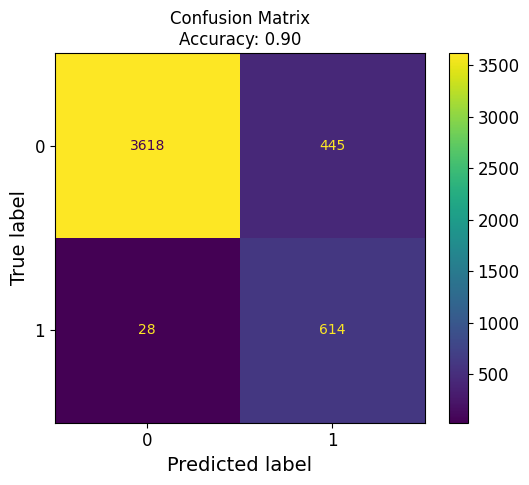

In [183]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')